/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_25633/2201936391.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(weights * Y) / np.sum(weights)  # 返回加权平均


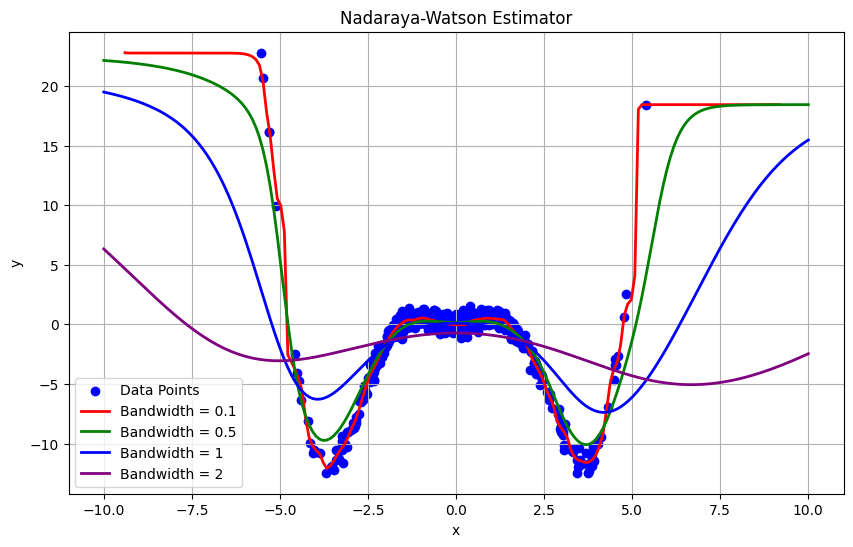

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(0)

# 参数设置
n = 500  # 样本数量

# 生成随机数据
x = np.random.normal(0, 2, n)  # x 是均值为0，方差为4的正态分布随机变量
epsilon = np.random.normal(0, np.sqrt(0.25), n)  # ε 是均值为0，方差为0.25的正态分布随机变量
y = x**2 * np.cos(x) + epsilon  # 根据关系生成 y

# Nadaraya-Watson 估计器函数
def nadaraya_watson_estimator(x_new, X, Y, bandwidth):
    weights = np.exp(-0.5 * ((X - x_new) / bandwidth) ** 2)  # 计算权重
    return np.sum(weights * Y) / np.sum(weights)  # 返回加权平均

# 生成新的 x 值用于预测
x_pred = np.linspace(-10, 10, 200)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')

# 尝试不同的带宽
bandwidths = [0.1, 0.5, 1, 2]
colors = ['red', 'green', 'blue', 'purple']

for i, bandwidth in enumerate(bandwidths):
    y_pred = np.array([nadaraya_watson_estimator(xi, x, y, bandwidth) for xi in x_pred])
    plt.plot(x_pred, y_pred, color=colors[i], label=f'Bandwidth = {bandwidth}', linewidth=2)

plt.title('Nadaraya-Watson Estimator')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


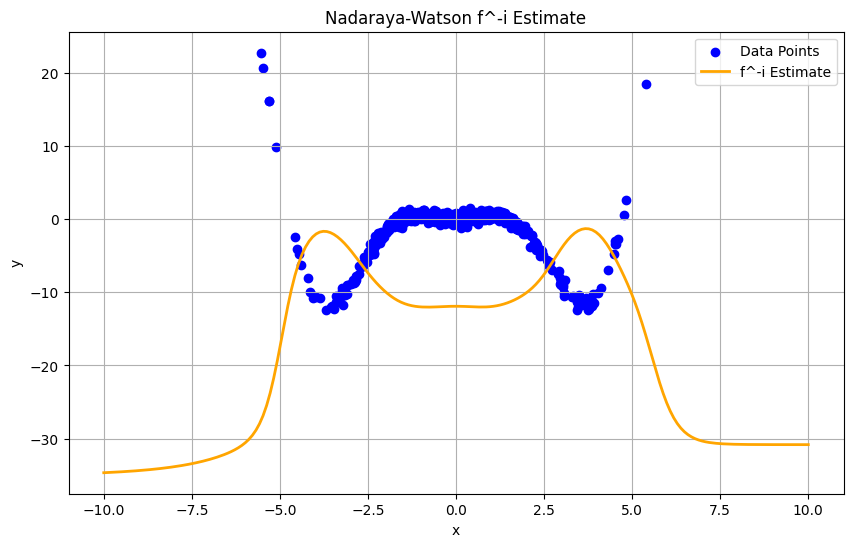

In [7]:
# 计算 Nadaraya-Watson 估计器的自协方差矩阵
def compute_Sii(X, bandwidth):
    n = len(X)
    S = np.zeros((n, n))
    for i in range(n):
        weights = np.exp(-0.5 * ((X - X[i]) / bandwidth) ** 2)  # 计算权重
        S[i, :] = weights / np.sum(weights)  # 每一行是权重的归一化
    return S

# 计算预测
def nw_minus_i(x_new, X, Y, bandwidth, i):
    S = compute_Sii(X, bandwidth)
    f_hat_i = nadaraya_watson_estimator(x_new, X, Y, bandwidth)  # 计算 NW 估计器
    S_ii = S[i, i]  # 获取自协方差
    return (Y[i] - f_hat_i) / (1 - S_ii)  # 计算 f^-i

# 生成新的 x 值用于预测
x_pred = np.linspace(-10, 10, 200)
y_minus_i_pred = np.array([nw_minus_i(xi, x, y, bandwidth=0.5, i=0) for xi in x_pred])  # 例子中选择 i=0

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_pred, y_minus_i_pred, color='orange', label='f^-i Estimate', linewidth=2)
plt.title('Nadaraya-Watson f^-i Estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


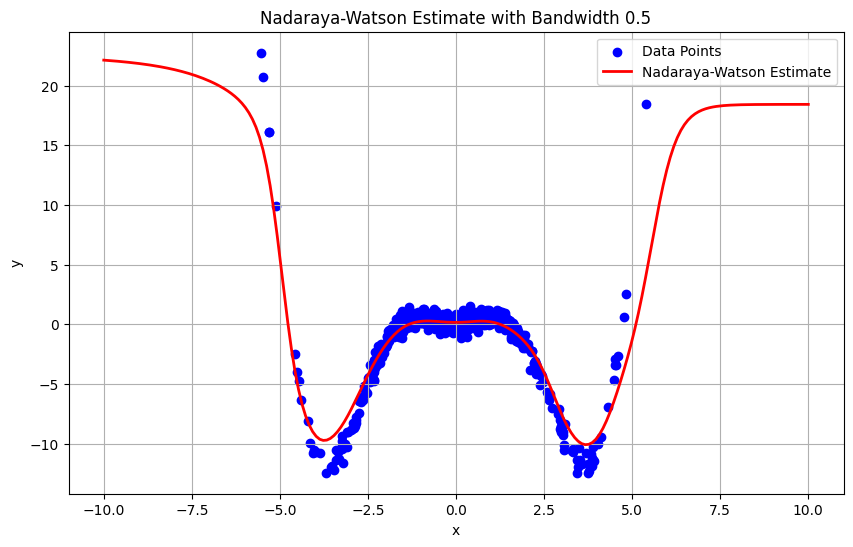

In [8]:
# 使用选择的带宽进行预测
chosen_bandwidth = 0.5  # 例子中的选择
y_pred = np.array([nadaraya_watson_estimator(xi, x, y, chosen_bandwidth) for xi in x_pred])

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_pred, y_pred, color='red', label='Nadaraya-Watson Estimate', linewidth=2)
plt.title(f'Nadaraya-Watson Estimate with Bandwidth {chosen_bandwidth}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


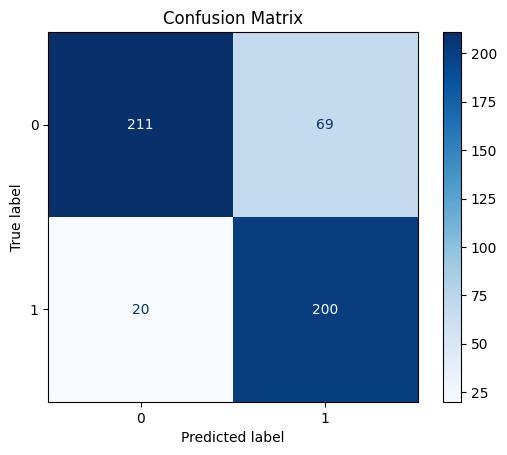

Confusion Matrix:
[[211  69]
 [ 20 200]]


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 设置随机种子
np.random.seed(0)

# 参数设置
n = 500  # 样本数量

# 生成随机数据
x = np.random.normal(0, 2, n)  # x 是均值为0，方差为4的正态分布随机变量
epsilon = np.random.normal(0, np.sqrt(0.25), n)  # ε 是均值为0，方差为0.25的正态分布随机变量
y = x**2 * np.cos(x) + epsilon  # 根据关系生成 y

# 计算 z_i
def compute_z(y):
    return (1 / (1 + np.exp(-y))) > 0.5

# 生成 z_i
z = compute_z(y).astype(int)

# Nadaraya-Watson 估计器函数
def nadaraya_watson_estimator(x_new, X, Y, bandwidth):
    weights = np.exp(-0.5 * ((X - x_new) / bandwidth) ** 2)  # 计算权重
    return np.sum(weights * Y) / np.sum(weights)  # 返回加权平均

# 设置带宽
h = 0.2

# 使用带宽进行预测
y_pred_probs = np.array([nadaraya_watson_estimator(xi, x, y, h) for xi in x])
y_pred = compute_z(y_pred_probs).astype(int)  # 根据预测概率生成二分类结果

# 计算混淆矩阵
conf_matrix = confusion_matrix(z, y_pred)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 输出混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 计算误分类率
misclassification_rate = 1 - accuracy_score(z, y_pred)
precision = precision_score(z, y_pred)
recall = recall_score(z, y_pred)

print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Misclassification Rate: 0.18
Precision: 0.74
Recall: 0.91


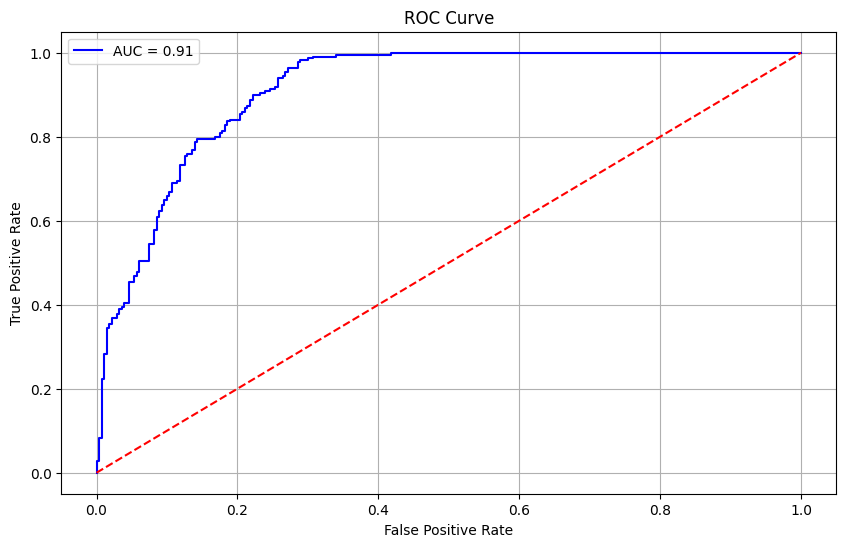

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(z, y_pred_probs)
auc_score = roc_auc_score(z, y_pred_probs)

# 绘制 ROC 曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # 对角线
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (200,) and (500,)

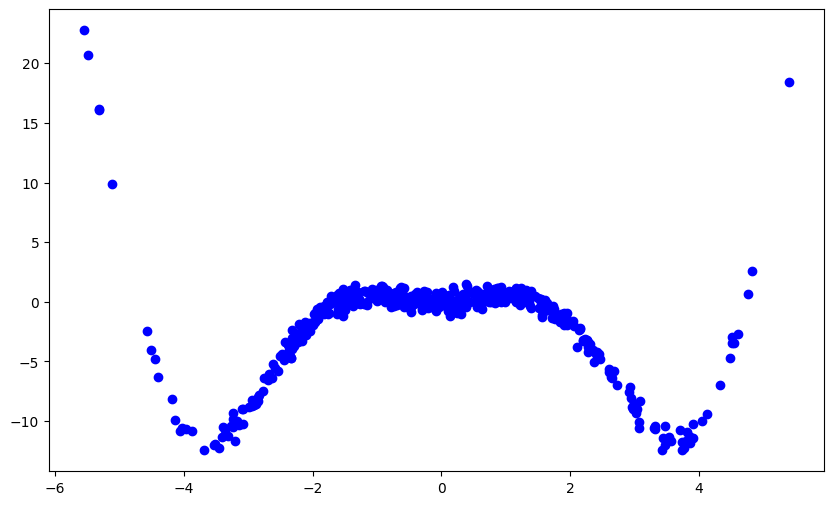

In [13]:
# 设置目标假阳性率
target_fpr = 0.2

# 查找合适的阈值
threshold = thresholds[np.argmin(np.abs(fpr - target_fpr))]
y_pred_adjusted = (y_pred_probs > threshold).astype(int)  # 使用调整后的阈值

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_pred, y_pred, color='red', label='Nadaraya-Watson Estimate', linewidth=2)
plt.title('Nadaraya-Watson Estimate with Adjusted Threshold')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
